<a href="https://colab.research.google.com/github/NimaZah/fast/blob/main/Teddy_vs_Grissly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
#import google drive package
from  google.colab import drive

In [5]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#save path to project folder 
root_path = 'gdrive/My Drive/Ai Projects/'

In [7]:
proj_path = 'gdrive/My Drive/Ai Projects/Bears/'

In [8]:
folders = ['grizzly','teddy']

In [9]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
data = ImageDataBunch.from_folder(proj_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.630528,0.187432,0.034091,00:27
1,0.335604,0.146942,0.022727,00:30
2,0.214443,0.101983,0.011364,00:28
3,0.160462,0.088309,0.011364,00:28


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [27]:
learn.save('stage-1')

In [28]:
#unfreeze model 
learn.unfreeze()

In [ ]:
learn.lr_find()

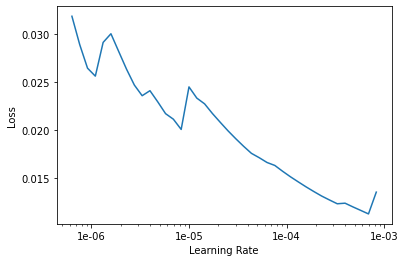

In [30]:
learn.recorder.plot()

In [31]:
#fit model with optimal learning rate 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.003742,0.090285,0.011364,00:28
1,0.012022,0.079366,0.011364,00:28


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [32]:
#save model 
learn.save('stage-2')

In [ ]:
#interpret model 
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)
# learn.interpret()

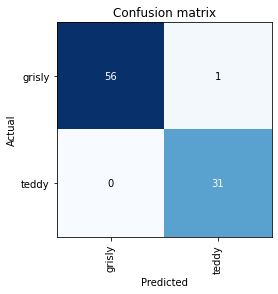

In [37]:
interp.plot_confusion_matrix()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

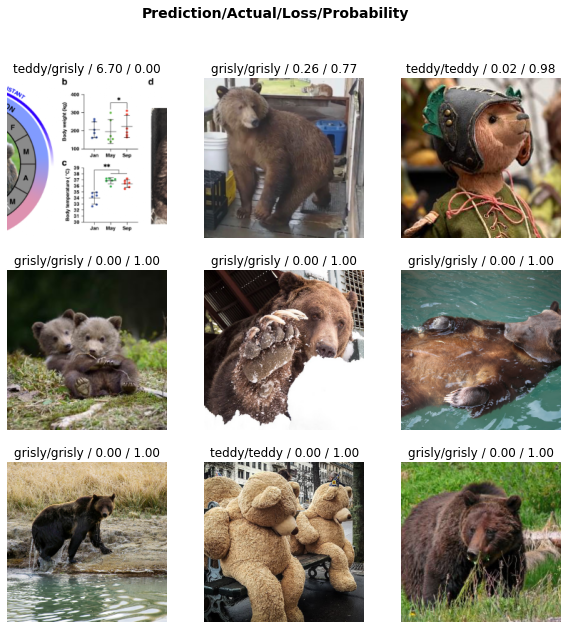

In [35]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))